In [3]:
import numpy as np
import pandas as pd
import warnings



In [43]:
warnings.filterwarnings('ignore')

In [44]:
column_names=["user_id","item_id","rating","timestamp"]
df=pd.read_csv("/home/kilgrave/Documents/movie recommendation/ml-100k/u.data",sep='\t',names=column_names)

In [45]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [46]:
df.shape

(100000, 4)

In [47]:
df["user_id"].nunique()

943

In [48]:
df["item_id"].nunique()

1682

In [49]:
movie_titles= pd.read_csv("/home/kilgrave/Documents/movie recommendation/ml-100k/u.item",sep='\|',header=None)

In [50]:
movie_titles.shape


(1682, 24)

In [51]:
movie_titles=movie_titles[[0,1]]


In [52]:
movie_titles.columns=["item_id","title"]

movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [54]:
df=pd.merge(df,movie_titles,on='item_id')

In [55]:
df.tail()

,user_id,item_id,rating,timestamp,title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


# Exporatory Data Analysis

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [123]:
df


,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
...,...,...,...,...,...
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [60]:
df.groupby('title').mean()

,user_id,item_id,rating,timestamp
title,,,,
'Til There Was You (1997),383.777778,1300.0,2.333333,8.861152e+08
1-900 (1994),477.000000,1353.0,2.600000,8.797260e+08
101 Dalmatians (1996),450.330275,225.0,2.908257,8.829281e+08
12 Angry Men (1957),453.552000,178.0,4.344000,8.828963e+08
187 (1997),517.097561,330.0,3.024390,8.850084e+08
...,...,...,...,...
Young Guns II (1990),504.068182,1188.0,2.772727,8.821855e+08
"Young Poisoner's Handbook, The (1995)",452.487805,547.0,3.341463,8.821438e+08
Zeus and Roxanne (1997),532.833333,1164.0,2.166667,8.775338e+08


In [63]:
df.groupby('title').mean()['rating'].sort_values(ascending=False)

title
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de d�cembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: rating, Length: 1664, dtype: float64

In [64]:
df.groupby('title').count()['rating'].sort_values(ascending=False)

title
Star Wars (1977)                              583
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
� k�ldum klaka (Cold Fever) (1994)              1
Name: rating, Length: 1664, dtype: int64

In [65]:
ratings=pd.DataFrame(df.groupby('title').mean()['rating'])

In [66]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [68]:
ratings['num of ratings']=pd.DataFrame(df.groupby('title').count()['rating'])

In [69]:
ratings

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [70]:
ratings.sort_values(by="rating",ascending=False)

,rating,num of ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


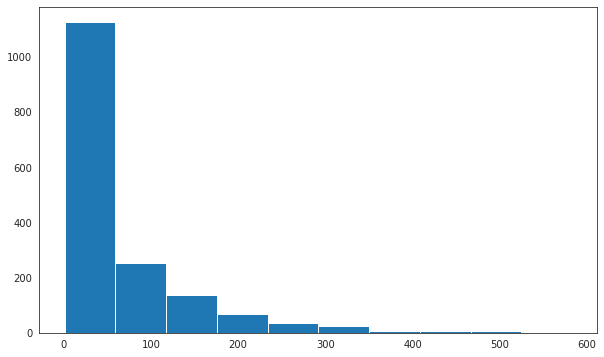

In [74]:
plt.figure(figsize=(10,6))
plt.hist(ratings['num of ratings'])
plt.show()

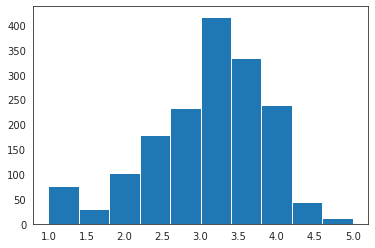

In [76]:
plt.hist(ratings['rating'])
plt.show()

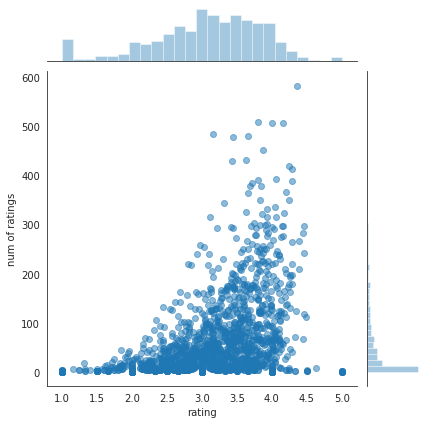

In [80]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

# Creating Movie recommendation


In [81]:
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [84]:
moviematrix=df.pivot_table(index="user_id",columns="title",values="rating")


In [85]:
moviematrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,� k�ldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [124]:
starwar_user_ratings=moviematrix['Star Wars (1977)']


In [142]:
starwar_user_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [143]:
similar_to_starwar=moviematrix.corrwith(starwar_user_ratings)

In [144]:
similar_to_starwar

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
� k�ldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [145]:
corr_starwars= pd.DataFrame(similar_to_starwar,columns=['Correlation'])

In [146]:
corr_starwars.dropna(inplace=True)

In [147]:
corr_starwars

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [131]:
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [148]:
corr_starwars.sort_values('Correlation',ascending=False)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
...,...
Roseanna's Grave (For Roseanna) (1997),-1.0
For Ever Mozart (1996),-1.0
American Dream (1990),-1.0


In [133]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [149]:
ratings

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [139]:
corr_starwars

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
...,...,...
Young Guns (1988),0.186377,101
Young Guns II (1990),0.228615,44
"Young Poisoner's Handbook, The (1995)",-0.007374,41


In [150]:
corr_starwars=corr_starwars.join(ratings['num of ratings'])

In [151]:
corr_starwars.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [153]:
corr_starwars[corr_starwars['num of ratings']>100]

,Correlation,num of ratings
title,,
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
2001: A Space Odyssey (1968),0.230884,259
Absolute Power (1997),0.085440,127
"Abyss, The (1989)",0.203709,151
...,...,...
Willy Wonka and the Chocolate Factory (1971),0.221902,326
"Wizard of Oz, The (1939)",0.266335,246
"Wrong Trousers, The (1993)",0.216204,118


In [154]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation',ascending=False)

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


# Predict Function

In [175]:
def predict_movie(movie_name):
    movie_user_ratings=moviematrix[movie_name]
    similar_to_movie=moviematrix.corrwith(movie_user_ratings)
    
    corr_movie=pd.DataFrame(similar_to_movie,columns=['Correlation'])
    corr_movie.dropna(inplace=True)
    
    corr_movie=corr_movie.join(ratings['num of ratings'])
    predictions=corr_movie[corr_movie['num of ratings']>100].sort_values('Correlation',ascending=False)
    
    return predictions

In [176]:
predictions = predict_movie("Edge, The (1997)")

In [178]:
predictions.head()

,Correlation,num of ratings
title,,
"Edge, The (1997)",1.000000,113
"Philadelphia Story, The (1940)",0.763763,104
Jungle2Jungle (1997),0.730877,132
Ace Ventura: Pet Detective (1994),0.723123,103
This Is Spinal Tap (1984),0.701123,191
